In [2]:
import json
import sys

sys.path.append('..')

import random

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from src.datasets.newsimages import NewsImageDataset

In [3]:
CSV_PATH = '../data/newsimages/newsimages_25_v1.0/newsarticles.csv'
IMAGE_PATH = '../data/newsimages/newsimages_25_v1.0/newsimages/'

In [6]:
news_image_dataset = NewsImageDataset(IMAGE_PATH, CSV_PATH, use_article_id_num=False)

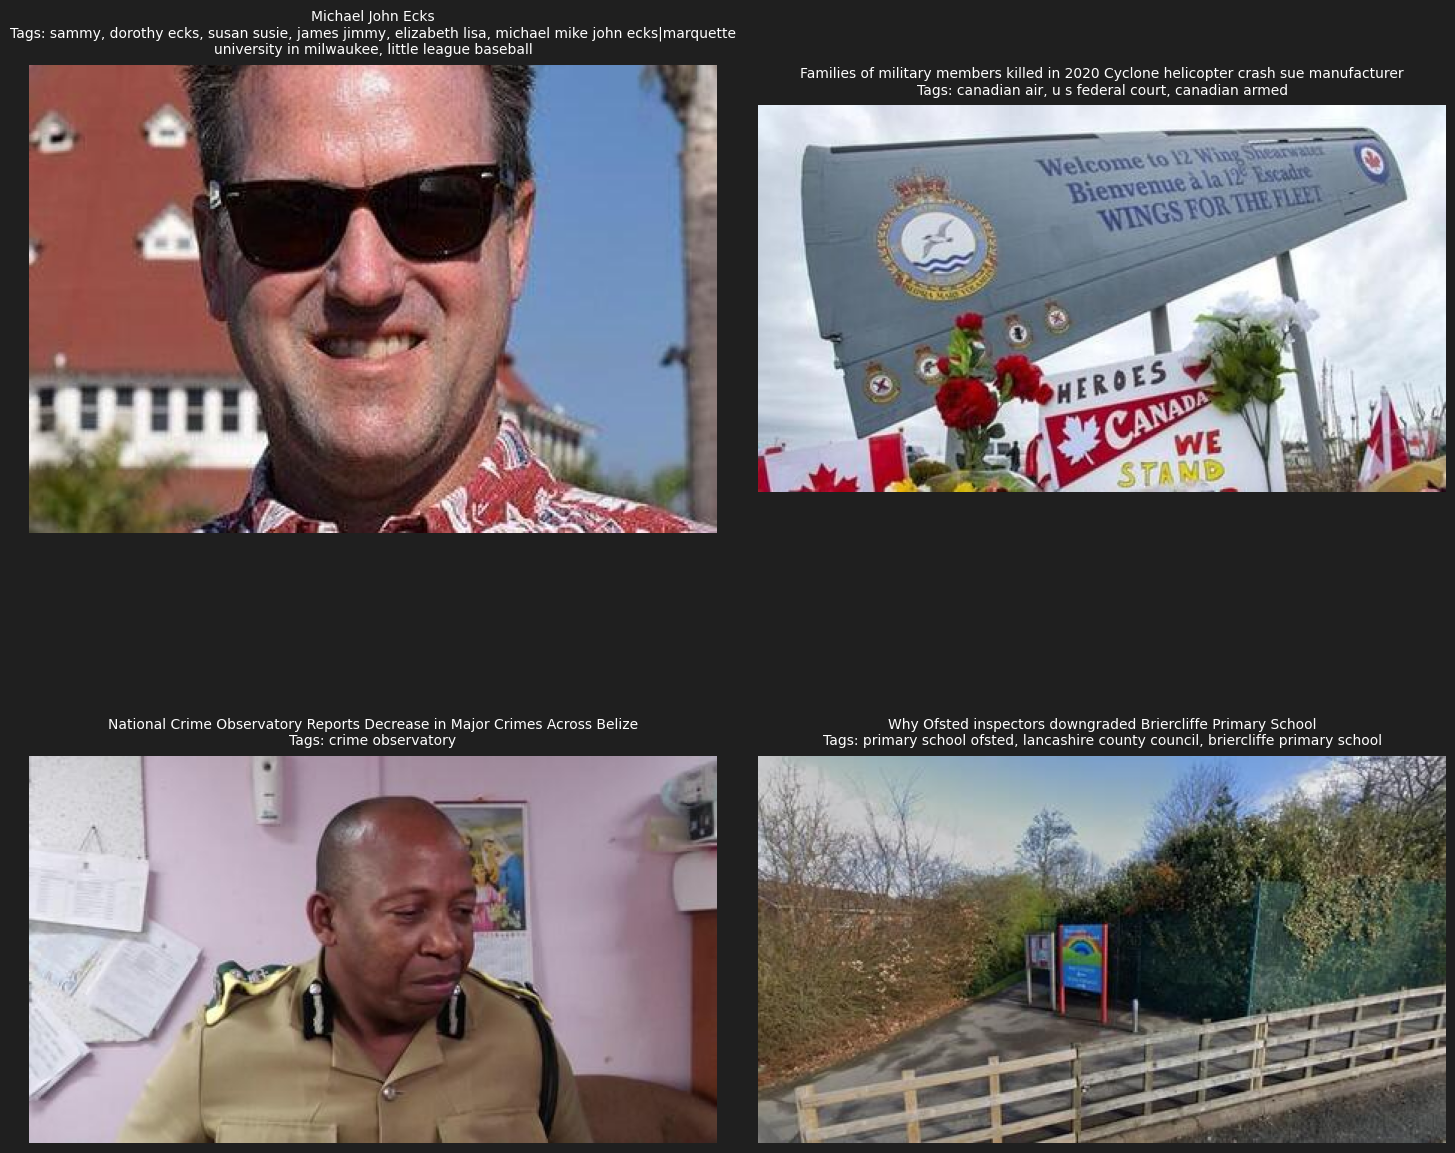

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()
fig.patch.set_facecolor('#1f1f1f')

random_indices = random.sample(range(len(news_image_dataset)), 4)

for i, idx in enumerate(random_indices):
    sample = news_image_dataset[idx]
    ax = axes[i]
    
    ax.imshow(sample['image'])

    title = sample['title']
    
    if 'tags' in sample:
        tags_text = '\nTags: ' + ', '.join(sample['tags'])
        title += tags_text
    
    ax.set_title(title, pad=10, wrap=True, fontsize=10, color='white')
    ax.axis('off')

plt.tight_layout(pad=3.0)
plt.show()

## Captions generated with Llama 3 8B

In [23]:
LLM_CAPTIONS_PATH = "../data/captions/llama38b_simple.json"

In [24]:
news_image_dataset = NewsImageDataset(
    image_path=IMAGE_PATH,
    csv_path=CSV_PATH,
    use_article_id_num=False
)

with open(LLM_CAPTIONS_PATH, "r") as f:
    captions = json.load(f)

1. Cillian Murphy's intense gaze
2. A mushroom cloud rises over a desolate landscape
3. A ticking clock looms large on a darkened wall
4. A montage of nuclear explosions and chaos
5. A close-up of a scientist's worried face amidst a swirling vortex


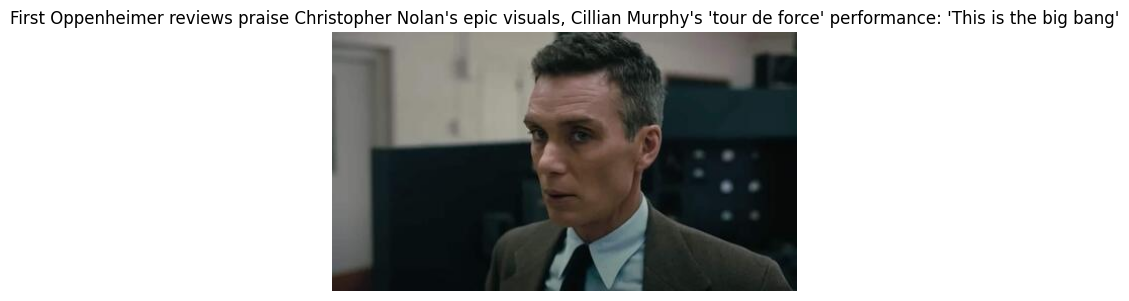

In [32]:
# Get a random sample
sample_idx = np.random.randint(0, len(news_image_dataset))
sample = news_image_dataset[sample_idx]
caption = captions[sample_idx]

# Create figure with image and captions
plt.figure(figsize=(6, 6))

plt.imshow(sample['image'])
plt.axis('off')
plt.title(f"{sample['title']}")

for i, cap in enumerate(caption["captions"], 1):
    print(f"{i}. {cap}")

